In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#data reading
file_path = 'consumerbehaviour.csv'
df = pd.read_csv(file_path)


print("Data Overview:")
print(df.info())
print("\nFirst few rows:")
print(df.head())


Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object

In [2]:
# Checking for missing values and pre-processing
print("\nMissing Values per Column:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')




Missing Values per Column:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [3]:
#statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       customer_id          age  purchase_amount_(usd)  review_rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       previous_purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [4]:
#unique counts
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())



Unique values in gender:
gender
Male      2652
Female    1248
Name: count, dtype: int64

Unique values in item_purchased:
item_purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values in category:
category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Unique values in location:
location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland         

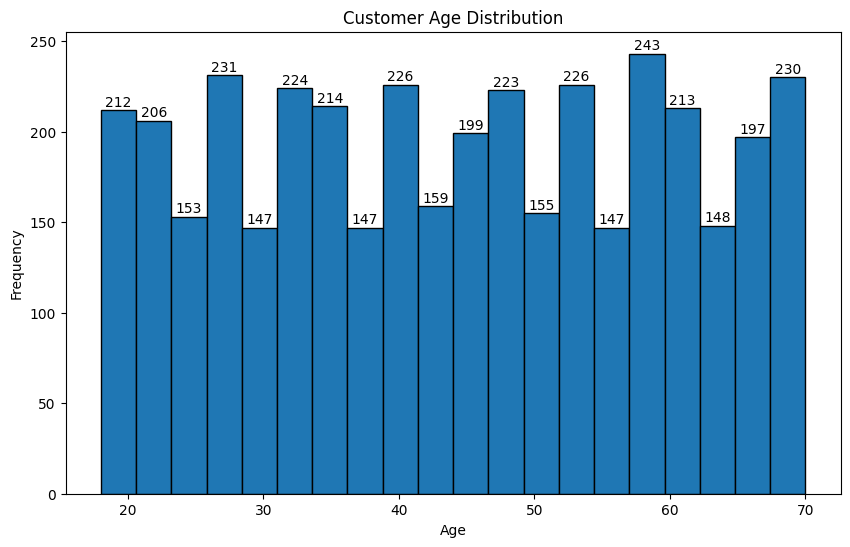

In [5]:
#customer age distribution
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

age_counts, bins, patches = plt.hist(df['age'], bins=20, edgecolor='black')
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")


for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             age_counts[i] + 0.5,
             int(age_counts[i]),
             ha='center', va='bottom')
plt.show()

<ipython-input-6-af6d7e359160>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")


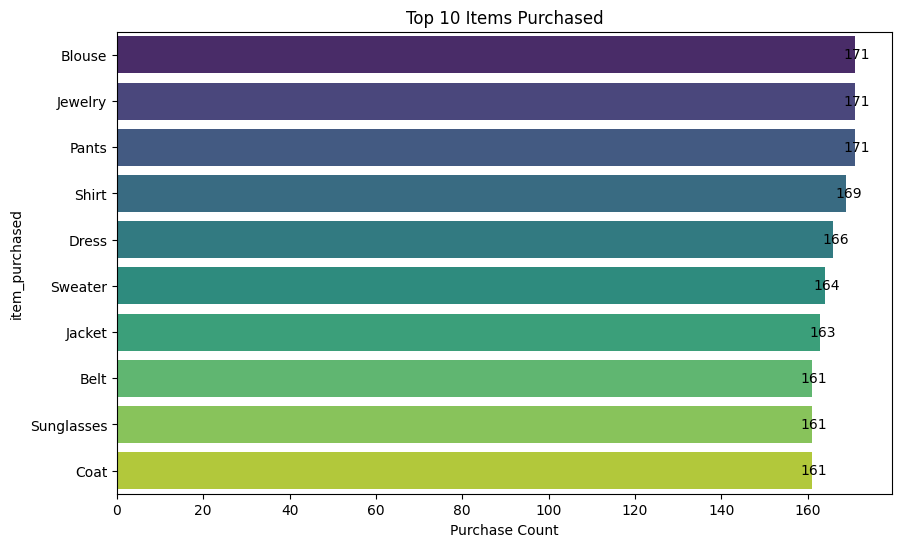

In [6]:
#top 10 items purchased
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
top_items = df['item_purchased'].value_counts().head(10)
sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")
plt.title("Top 10 Items Purchased")
plt.xlabel("Purchase Count")


for index, value in enumerate(top_items.values):
    plt.text(value + 0.5, index, str(value), ha='center', va='center')

plt.show()


<ipython-input-7-877cb2846650>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_purchase_by_category.index, y=avg_purchase_by_category.values, palette="viridis")


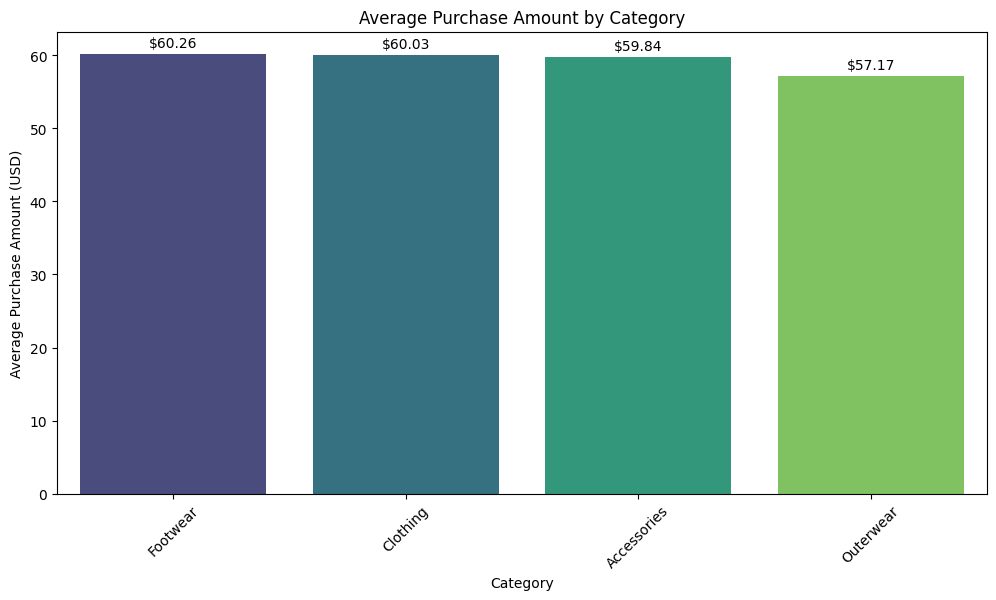

In [7]:
#average purchase amount by category of products
plt.figure(figsize=(12, 6))
avg_purchase_by_category = df.groupby('category')['purchase_amount_(usd)'].mean().sort_values(ascending=False)
sns.barplot(x=avg_purchase_by_category.index, y=avg_purchase_by_category.values, palette="viridis")
plt.title("Average Purchase Amount by Category")
plt.xlabel("Category")
plt.ylabel("Average Purchase Amount (USD)")
plt.xticks(rotation=45)


for index, value in enumerate(avg_purchase_by_category.values):
    plt.text(index, value + 0.5, f"${value:.2f}", ha='center', va='bottom')

plt.show()

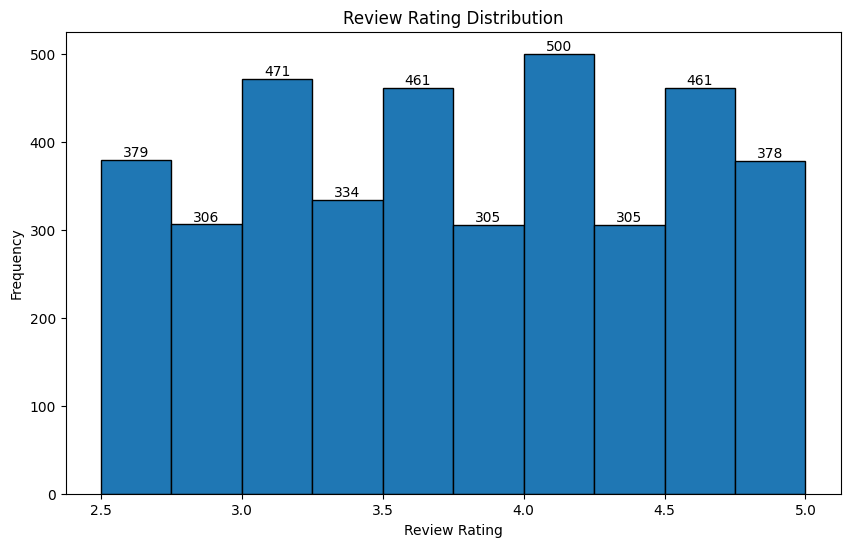

In [8]:
#Review rating distribution
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
review_counts, bins, patches = plt.hist(df['review_rating'], bins=10, edgecolor='black')
plt.title("Review Rating Distribution")
plt.xlabel("Review Rating")
plt.ylabel("Frequency")

for i in range(len(patches)):
    plt.text(patches[i].get_x() + patches[i].get_width() / 2,
             review_counts[i] + 0.5,
             int(review_counts[i]),
             ha='center', va='bottom')

plt.show()


<ipython-input-9-6e2e429f599e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")


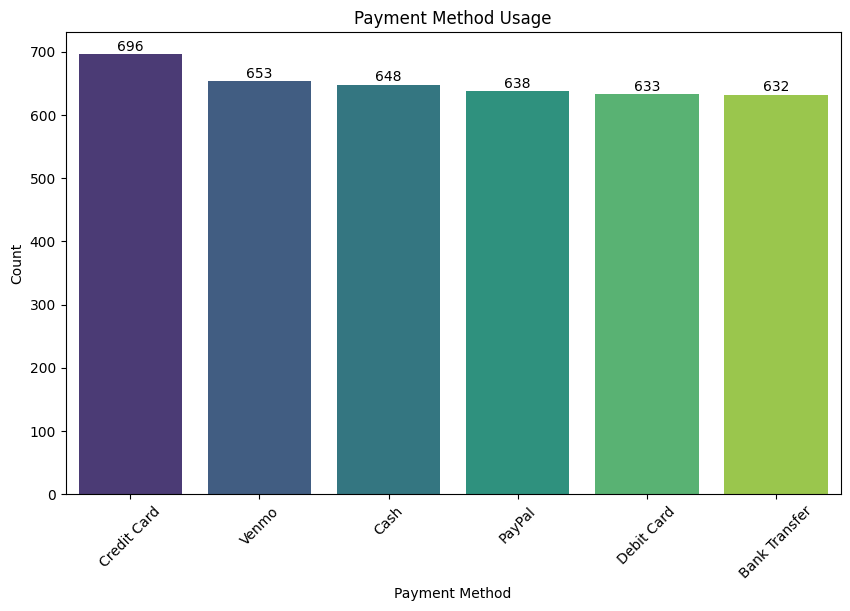

In [9]:
#payment method usage
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
payment_counts = df['payment_method'].value_counts()
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Payment Method Usage")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=45)


for index, value in enumerate(payment_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


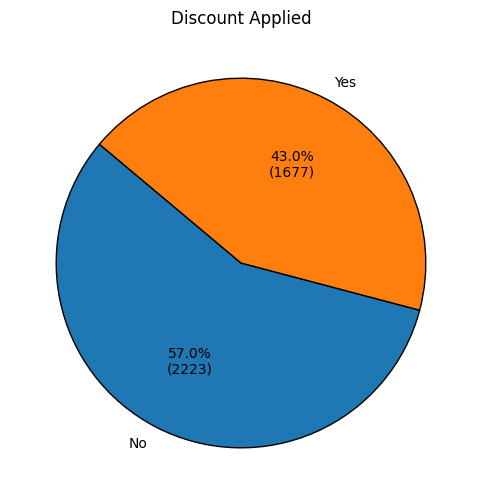

In [10]:
#discount
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 6))
discount_counts = df['discount_applied'].value_counts()


def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

discount_counts.plot(
    kind='pie',
    autopct=lambda pct: func(pct, discount_counts),
    startangle=140,
    title="Discount Applied",
    wedgeprops=dict(edgecolor='black')
)
plt.ylabel("")
plt.show()


<ipython-input-11-8548922aefb5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette="viridis")


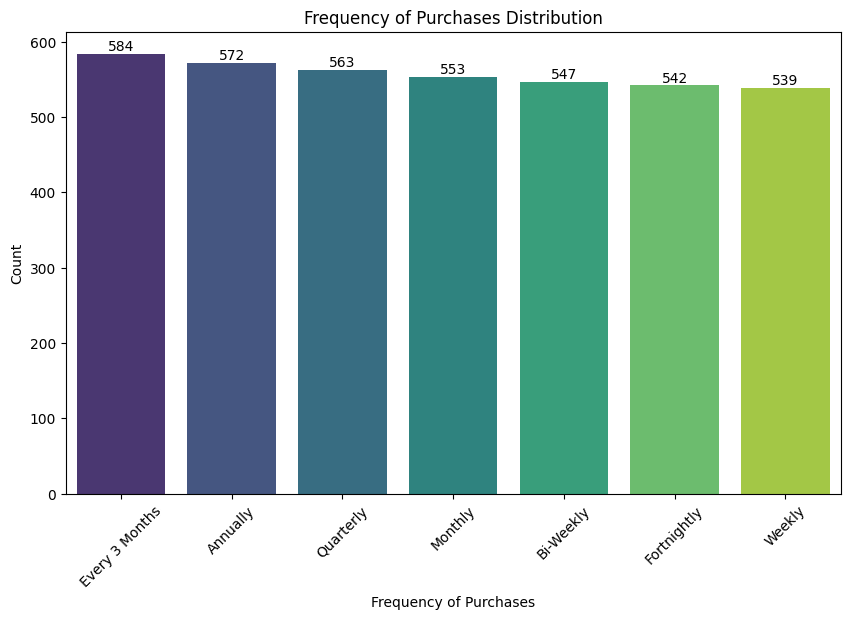

In [11]:
#Frequency of purchases distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
purchase_frequency_counts = df['frequency_of_purchases'].value_counts()
sns.barplot(x=purchase_frequency_counts.index, y=purchase_frequency_counts.values, palette="viridis")
plt.title("Frequency of Purchases Distribution")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Count")
plt.xticks(rotation=45)


for index, value in enumerate(purchase_frequency_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()


<ipython-input-12-94898919091d>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df.groupby('age_group')['purchase_amount_(usd)'].mean()


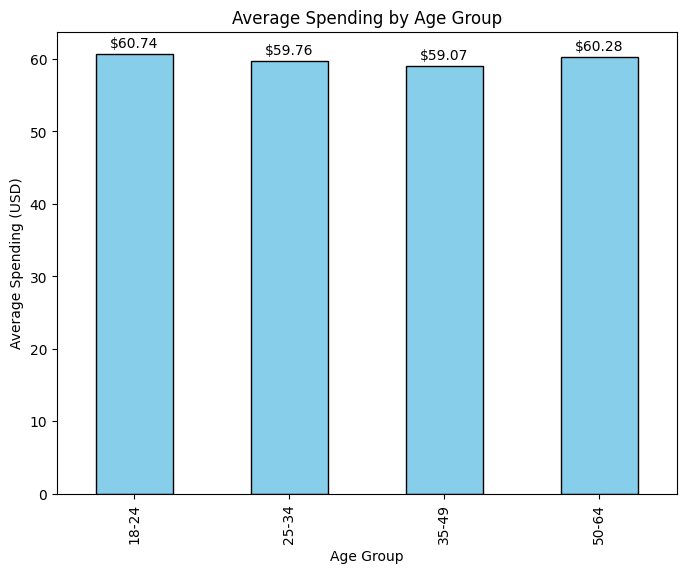

In [12]:
#avg spending by age group
import matplotlib.pyplot as plt


df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 50, 65], labels=['18-24', '25-34', '35-49', '50-64'])
age_group_spending = df.groupby('age_group')['purchase_amount_(usd)'].mean()


plt.figure(figsize=(8, 6))
age_group_spending.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Spending by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spending (USD)")

for index, value in enumerate(age_group_spending):
    plt.text(index, value + 0.5, f"${value:.2f}", ha='center', va='bottom')

plt.show()


In [13]:
#avg order value
customer_lifetime_value = df.groupby('customer_id')['purchase_amount_(usd)'].sum()
print(customer_lifetime_value.head())
total_revenue = df['purchase_amount_(usd)'].sum()
total_orders = df['purchase_amount_(usd)'].count()
aov = total_revenue / total_orders
print("Average Order Value (AOV): $", round(aov, 2))


customer_id
1    53
2    64
3    73
4    90
5    49
Name: purchase_amount_(usd), dtype: int64
Average Order Value (AOV): $ 59.76


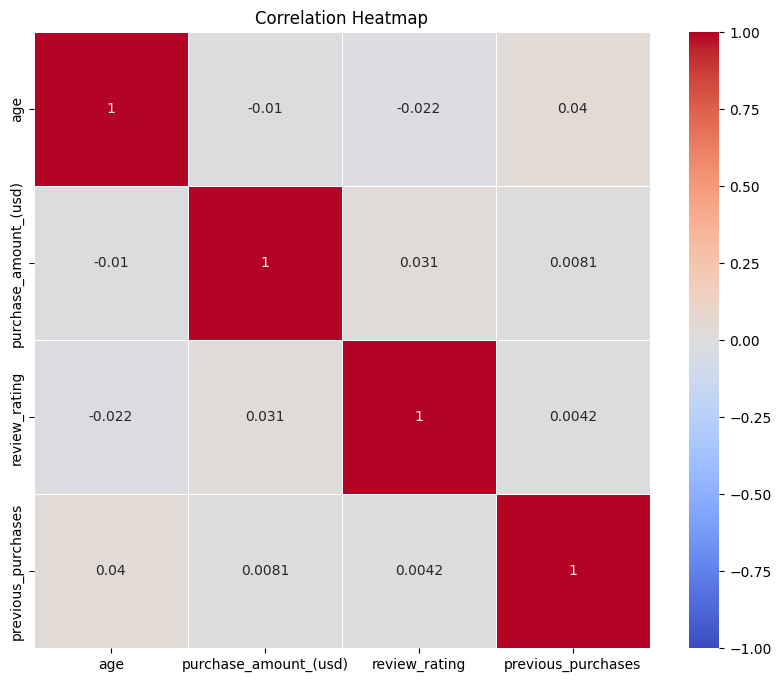

In [14]:
#correlqtion heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = df[['age', 'purchase_amount_(usd)', 'review_rating', 'previous_purchases']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [14]:
pip install plotly.express


In [15]:
#bubble chart for product popularity and avg rating
import plotly.express as px


product_data = df.groupby('item_purchased').agg({
    'purchase_amount_(usd)': 'sum',
    'review_rating': 'mean',
    'item_purchased': 'size'
}).rename(columns={'item_purchased': 'purchase_count'})

fig = px.scatter(product_data, x='purchase_count', y='review_rating', size='purchase_amount_(usd)',
                 hover_name=product_data.index, title="Product Popularity and Average Rating",
                 labels={'purchase_count': 'Number of Purchases', 'review_rating': 'Average Rating'})
fig.update_traces(marker=dict(opacity=0.6, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


In [16]:
import plotly.express as px


hierarchy_data = df.groupby(['age_group', 'category', 'item_purchased']).size().reset_index(name='count')

# sunburst chart for customer purchase hierarchy
fig = px.sunburst(hierarchy_data, path=['age_group', 'category', 'item_purchased'], values='count',
                  title="Customer Purchase Hierarchy")
fig.show()


<ipython-input-16-f6d692dd224d>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=F

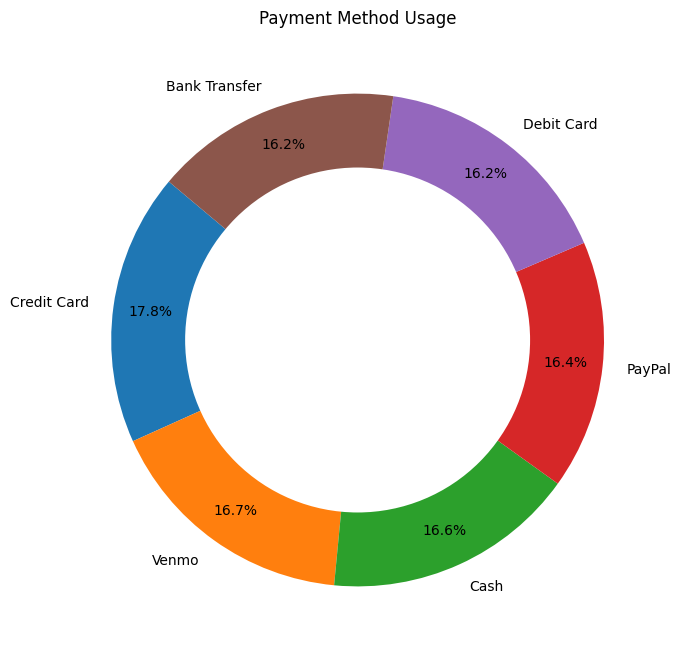

In [17]:
import matplotlib.pyplot as plt
#payment method usage  chart
payment_counts = df['payment_method'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
center_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title("Payment Method Usage")
plt.show()



Based on the data and analysis provided, here are some trends and insights identified from the consumer behavior dataset:

1. Demographics and Customer Profile
Age Distribution: The average age of customers is around 44 years, with a range spanning from 18 to 70. This indicates a broad age range of customers, but the largest segment might be middle-aged adults.
Gender Distribution: The dataset contains a majority of male customers (approximately 68%), suggesting a male-dominant customer base.
2. Spending Patterns
Average Purchase Amount: The average purchase amount is about $59.76, with a wide variance. Some customers tend to make smaller purchases, while others buy high-value items.
Purchase Amount by Category: Categories like Clothing and Accessories are among the most popular, with significant average spending. This could suggest these categories are core to the business's product offering.
Spending by Age Group: Customers aged 25-34 and 35-49 show higher average spending, which could indicate that these age groups are more financially capable and willing to spend more.
3. Seasonal and Product Preferences
Seasonal Trends: The dataset shows a balanced distribution across all seasons, but Spring and Winter have slightly higher sales. This could indicate peak shopping seasons, possibly driven by holiday sales in Winter and Spring promotions.
Top Products: Items like blouses, jewelry, pants, and shirts are highly popular, suggesting these items are well-targeted to customer needs or preferences.
Colors and Sizes: Common colors such as olive, yellow, and silver are popular among customers, and medium (M) and large (L) sizes are the most commonly purchased. This might influence inventory planning to focus on these popular colors and sizes.
4. Discounts and Promotions
Discount and Promo Code Usage: Approximately 43% of purchases involved a discount, showing that a significant portion of customers are influenced by promotions. This suggests a customer base that responds positively to discounts, making promotions an effective sales driver.
Purchase Frequency with Discounts: Customers with discounts applied tend to have a higher purchase frequency. Promotional offers could be a strong tactic for increasing purchase rates.
5. Payment and Shipping Preferences
Payment Methods: Credit cards, Venmo, and cash are the most common payment methods. The preference for digital payment options (like Venmo) suggests that customers are open to modern, digital payment methods.
Shipping Options: "Free Shipping" is one of the top choices, with express and next-day options also frequently used. This might imply that customers value fast shipping but appreciate free shipping as an incentive.
6. Review Ratings
Average Rating: The average product review rating is around 3.75, with a slightly higher concentration around 3 to 4 stars. This suggests overall satisfaction but also highlights room for improvement, possibly by focusing on product quality or customer service enhancements.
7. Frequency of Purchases
Purchase Frequency Trends: Weekly and bi-weekly purchase frequencies are notable, indicating a pattern of frequent repeat customers. However, there is also a significant proportion of customers who make purchases quarterly or annually, possibly indicating different levels of customer loyalty or spending habits.

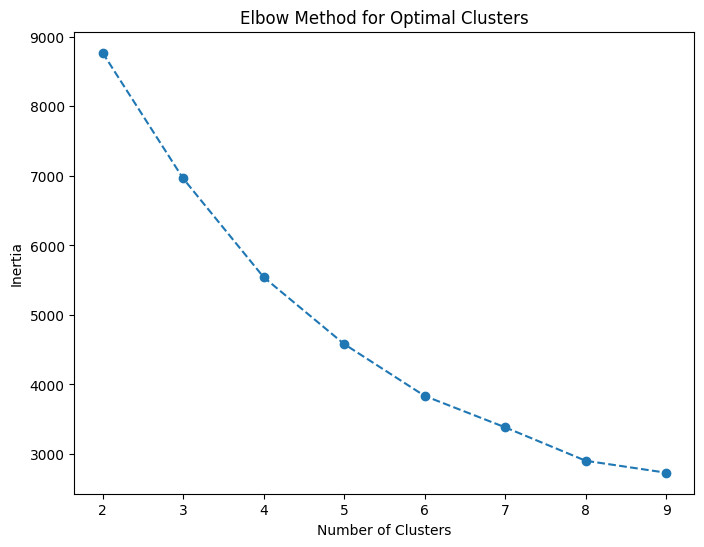

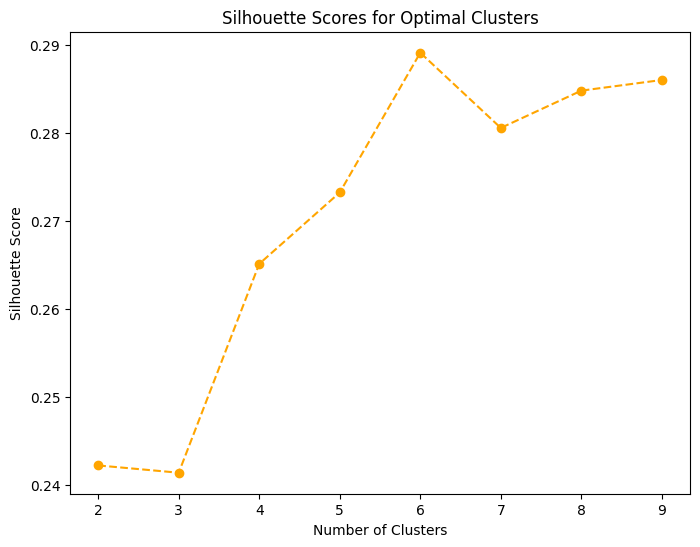

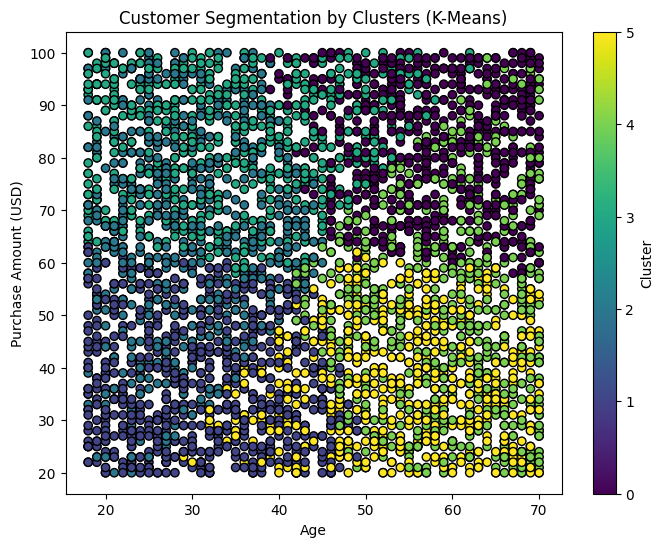

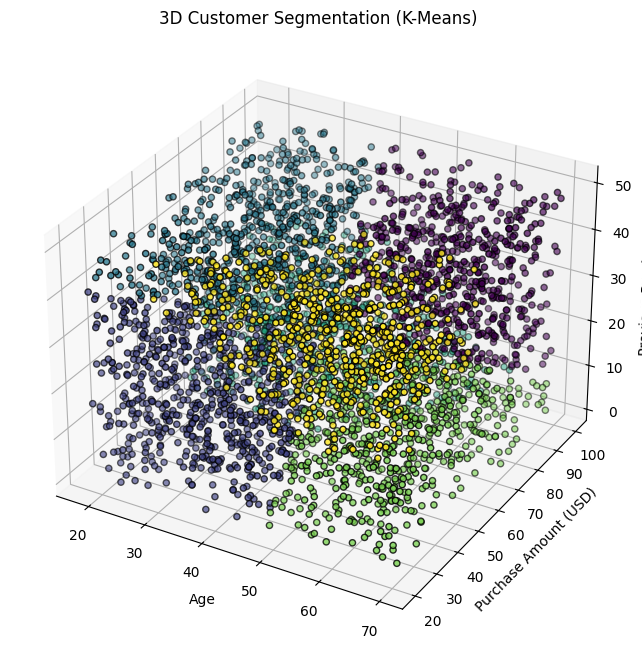

K-Means clustering results saved to: kmeans_clustering_results.csv
Cluster centroids saved to: cluster_centroids.csv


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Step 1: Select features and scale the data
clustering_features = df[['age', 'purchase_amount_(usd)', 'previous_purchases']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []

for k in range(2, 10):  # Test cluster sizes from 2 to 9
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)  # Inertia (SSE)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Clusters')
plt.show()

# Optional: Display Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), silhouette_scores, marker='o', linestyle='--', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters')
plt.show()

# Step 3: Apply K-Means clustering with the chosen number of clusters
optimal_clusters = 6 # Replace with your choice based on the Elbow/Silhouette method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 4: Visualize clusters (2D visualization using two features)
plt.figure(figsize=(8, 6))
plt.scatter(clustering_features['age'], clustering_features['purchase_amount_(usd)'], c=df['cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.title('Customer Segmentation by Clusters (K-Means)')
plt.colorbar(label='Cluster')
plt.show()

# Optional: 3D Visualization (if you have three features)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    clustering_features['age'],
    clustering_features['purchase_amount_(usd)'],
    clustering_features['previous_purchases'],
    c=df['cluster'], cmap='viridis', edgecolor='k'
)
ax.set_xlabel('Age')
ax.set_ylabel('Purchase Amount (USD)')
ax.set_zlabel('Previous Purchases')
ax.set_title('3D Customer Segmentation (K-Means)')
plt.show()

# Step 5: Save the results to a CSV file
output_file = "kmeans_clustering_results.csv"
df.to_csv(output_file, index=False)
print(f"K-Means clustering results saved to: {output_file}")

# Step 6: Optional - Export Cluster Centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)  # Reverse scaling for original values
centroids_df = pd.DataFrame(centroids, columns=['age', 'purchase_amount_(usd)', 'previous_purchases'])
centroids_file = "cluster_centroids.csv"
centroids_df.to_csv(centroids_file, index=False)
print(f"Cluster centroids saved to: {centroids_file}")


In [23]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357279 sha256=2244a0fde6eeaf40fbe0c657818caf4178009d351d8fbafef7b131a0aeaf8027
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [69]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Prepare data for collaborative filtering
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['customer_id', 'item_purchased', 'review_rating']], reader)

# Train-Test Split
trainset, testset = train_test_split(data, test_size=0.2)

# Train SVD model
model = SVD()
model.fit(trainset)

# Predict and evaluate
predictions = model.test(testset)
print("\nCollaborative Filtering RMSE:", accuracy.rmse(predictions))

# Recommend products for a specific customer
def recommend_products(customer_id, top_n=5):
    purchased_items = df[df['customer_id'] == customer_id]['item_purchased'].unique()
    all_items = df['item_purchased'].unique()
    recommendations = []

    for item in all_items:
        if item not in purchased_items:
            score = model.predict(customer_id, item).est
            recommendations.append((item, score))

    # Sort by score and return top N
    recommendations.sort(key=lambda x: x[1], reverse=True)
    return recommendations[:top_n]

# Example usage
customer_id = 3900
print(f"\nRecommendations for Customer {customer_id}:")
print(recommend_products(customer_id, top_n=5))

RMSE: 1.5538

Collaborative Filtering RMSE: 1.5537770958915078

Recommendations for Customer 3900:
[('Blouse', 4.127872869392876), ('Pants', 4.1), ('Shirt', 4.1), ('Jewelry', 4.087445819720521), ('Dress', 4.077473428944843)]


In [73]:
recommendations = recommend_products(customer_id, top_n=5)
recommendations_df = pd.DataFrame(recommendations, columns=['item_purchased', 'predicted_score'])
recommendations_df.to_csv(f"recommendations_customer_{customer_id}.csv", index=False)
print(f"Recommendations saved for Customer {customer_id}.")


Recommendations saved for Customer 3900.


Anomalies saved to 'anomalies.csv'
Normal points saved to 'normal_points.csv'


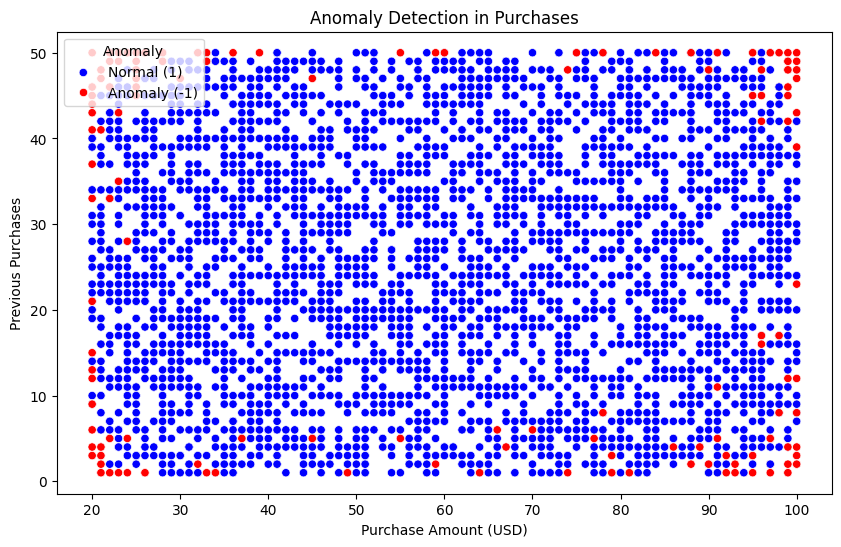

In [76]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'consumerbehaviour.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preprocess column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Select features for anomaly detection
anomaly_features = df[['purchase_amount_(usd)', 'previous_purchases', 'review_rating']].dropna()

# Fit Isolation Forest
model = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = model.fit_predict(anomaly_features)

# Save anomalies and normal points to separate CSV files
anomalies = df[df['anomaly'] == -1]
normal_points = df[df['anomaly'] == 1]

# Save to CSV files
anomalies.to_csv("anomalies.csv", index=False)
normal_points.to_csv("normal_points.csv", index=False)

print("Anomalies saved to 'anomalies.csv'")
print("Normal points saved to 'normal_points.csv'")

# Visualize anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='purchase_amount_(usd)',
    y='previous_purchases',
    hue='anomaly',
    palette={1: 'blue', -1: 'red'}
)
plt.title("Anomaly Detection in Purchases")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.legend(title="Anomaly", labels=["Normal (1)", "Anomaly (-1)"])
plt.show()


In [77]:
# Count anomalies and normal points
num_anomalies = len(anomalies)
num_normal_points = len(normal_points)

print(f"Number of red dots (anomalies): {num_anomalies}")
print(f"Number of blue dots (normal points): {num_normal_points}")


Number of red dots (anomalies): 195
Number of blue dots (normal points): 3705


3. Regression for Revenue Prediction
What it Does:
Predicts the purchase amount (purchase_amount_(usd)) based on customer demographics and behavior.
Why Add It?
Helps identify potential high-value customers for targeted marketing.

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
features = df[['age', 'previous_purchases', 'review_rating']].dropna()
target = df['purchase_amount_(usd)']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Add predicted purchase amount to DataFrame
df['predicted_purchase_amount'] = regressor.predict(features)

# Save results to a CSV
regression_output_file = "predicted_purchase_amount.csv"
df.to_csv(regression_output_file, index=False)

print(f"Predicted purchase amount results saved to: {regression_output_file}")


Predicted purchase amount results saved to: predicted_purchase_amount.csv
